# **Introduction**: The goal of this notebook is to create a machine learning model to accurately predict cases of car insurance fraud and to understand what characterisitcs in a claim are most indicative of potential fraud

Data: https://www.kaggle.com/roshansharma/insurance-claim

GitHub: https://github.com/ArielJosephCohen/capstone

Presentation: https://docs.google.com/presentation/d/1IQdYSxrzyGvMpurhM-i097Btp4ksqL70WLEiM6yc5Sw/edit#slide=id.g35f391192_00

# **Notebook**

## Imports and data reading

#### The first step is to import all the funcrtionalities needed to operate and read the data necessary for the remainder of the notebook

In [1]:
# import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import helper_module as hm
from helper_module import *
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
# load data twice; once for manipulation and once for reference
df = pd.read_csv('Claims.csv')
df2 = pd.read_csv('Claims.csv')

## Randomness

#### Here, I assign a random seed for the purpose of having uniform results in different trials that involve randomness

In [3]:
# assign uniform random state for reproduable results
seed = 14

## Look at data

#### Here, I take a look at the basic data in the context of a data frame, the histograms of numerical features, and information regarding the target feature

In [4]:
# general overview of data
print(df.shape)
(df.head())

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
# features in data
(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
# information about data features
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [7]:
# basic statistics on numerical features
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
# breakdown of target feature
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [9]:
# graph the relationship between different variables in the data
plt.tight_layout()
#(sns.pairplot(df))

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127f79b50>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

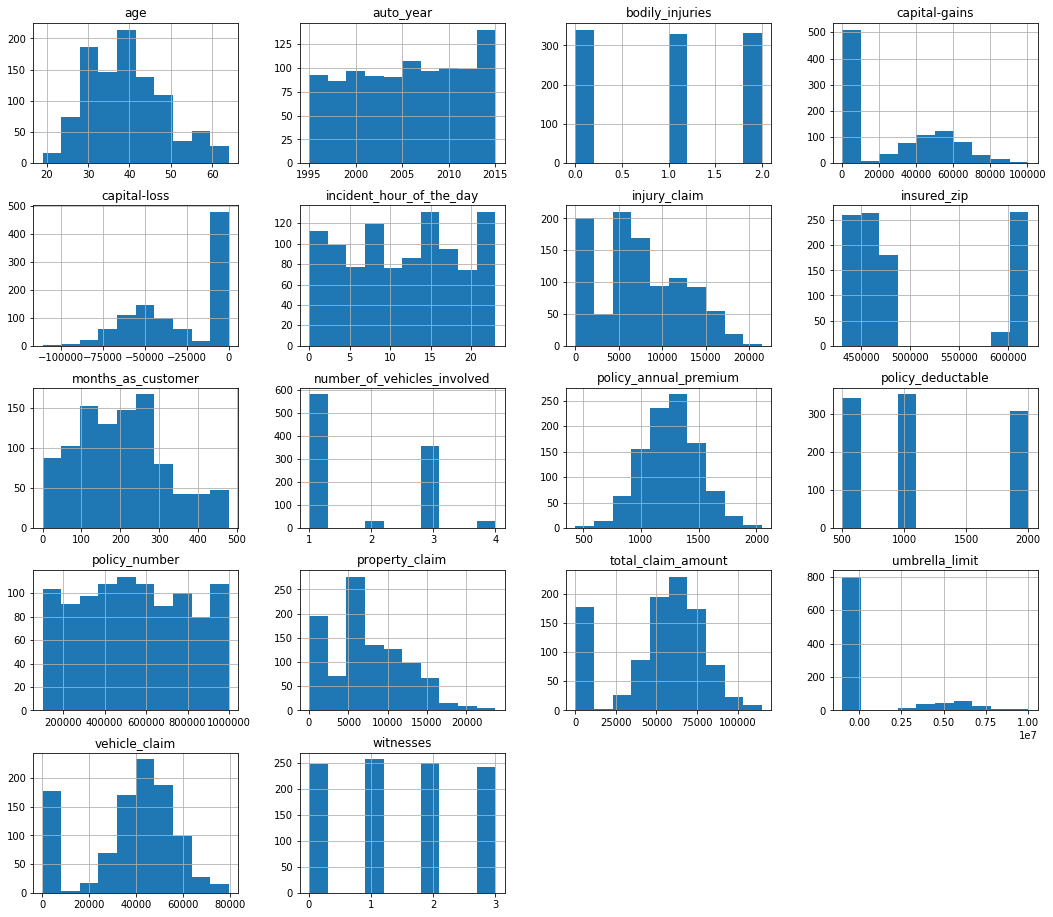

In [10]:
# histograms of numerical data
plt.tight_layout()
df.hist(figsize=(18,16))

## Exploratory data analysis

#### Here, I provide some illustrations to get a more visual feel for the content of the data

In [11]:
# reminder of features present
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [12]:
# data restricted to cases where fraud occured
fraud_df = df[df['fraud_reported']=='Y']
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aa4b390>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

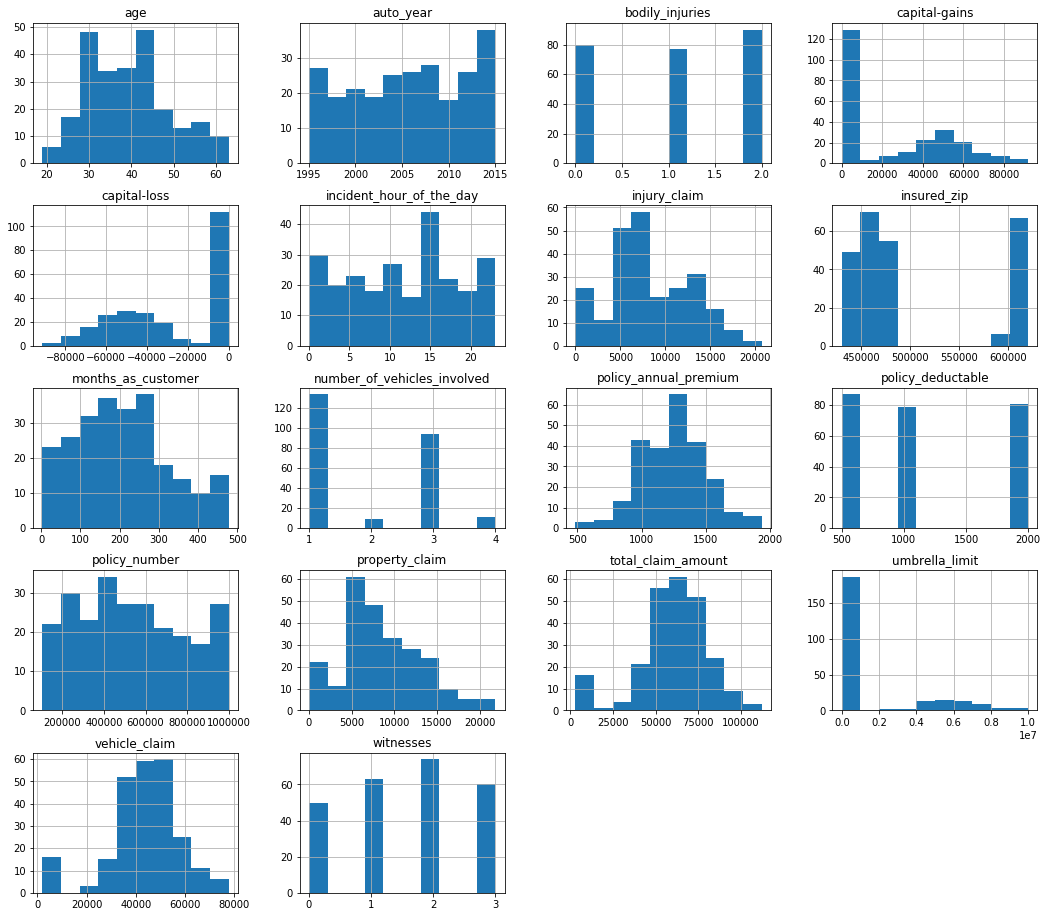

In [13]:
# histogram of data in cases of fraud present
plt.tight_layout()
fraud_df.hist(figsize=(18,16))

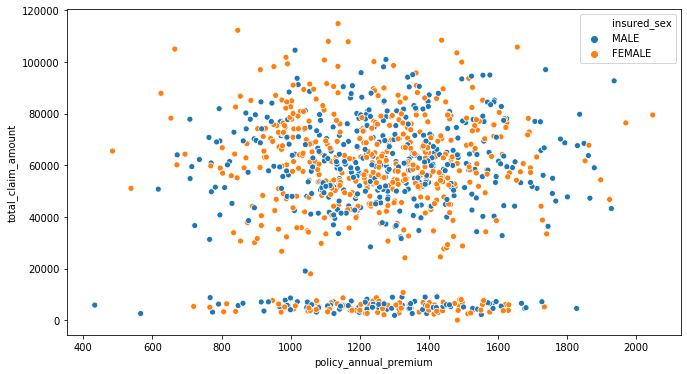

In [14]:
# graph relationship between premiums and claim amounts
plt.figure(figsize=(11,6))
plt.tight_layout()
sns.scatterplot(df.policy_annual_premium,df.total_claim_amount,hue=df.insured_sex)

All


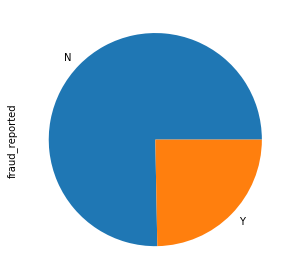

Illinois


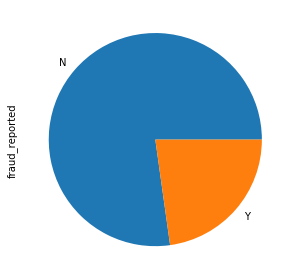

Indiana


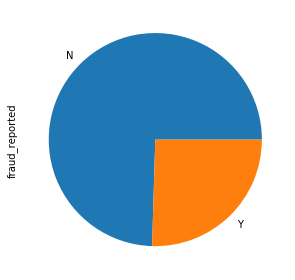

Ohio


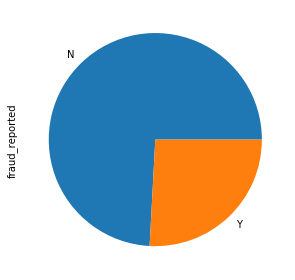

In [15]:
# pie charts of the geographical breakdown of fraud occurances
print('All')
df.fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Illinois')
df[df.policy_state=='IL'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Indiana')
df[df.policy_state=='IN'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Ohio')
df[df.policy_state=='OH'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()

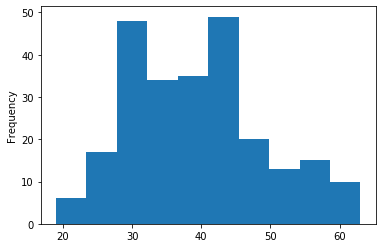

In [16]:
# histogram of ages when fraud occurs
df[df.fraud_reported=='Y'].age.plot(kind='hist')

(0, 300)

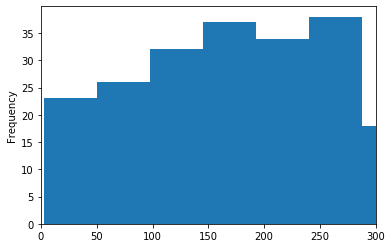

In [17]:
# histogram of months as customer when fraud occurs
df[df.fraud_reported=='Y'].months_as_customer.plot(kind='hist')
plt.xlim(0,300)

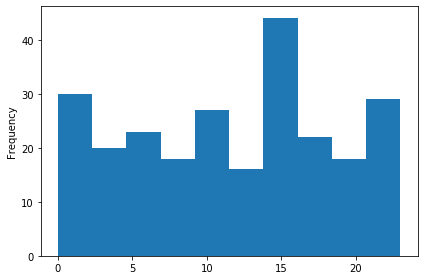

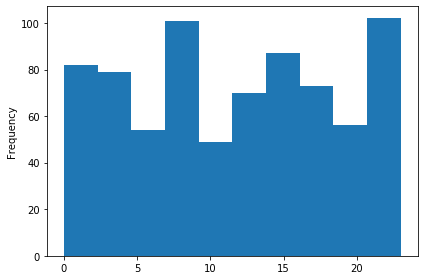

In [18]:
# comparing hours when fraud occured to hours when fraud did not occur
df[df.fraud_reported=='Y'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()
df[df.fraud_reported=='N'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()

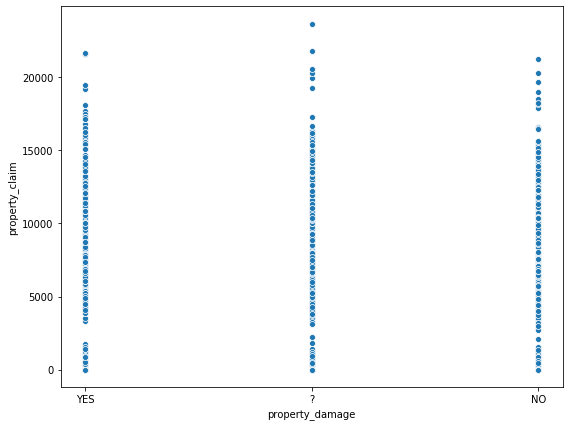

In [19]:
# relationship of claim to property damage
plt.figure(figsize=(9,7))
plt.tight_layout()
sns.scatterplot(df.property_damage,df.property_claim)

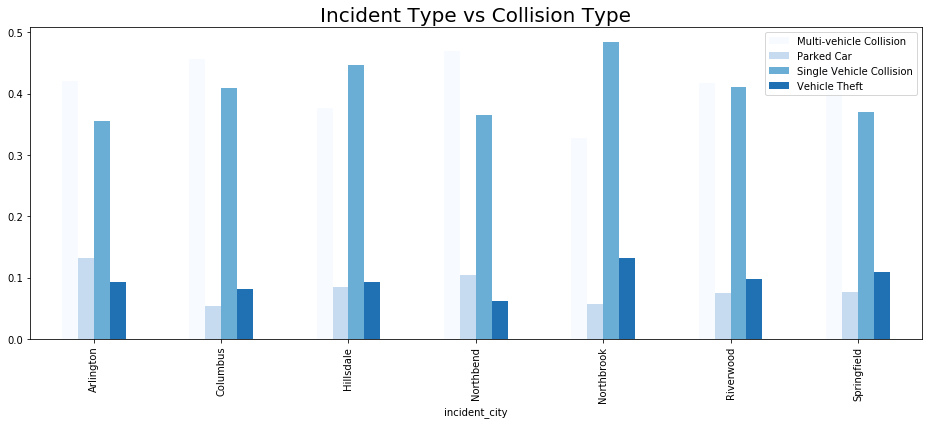

In [20]:
# breakdown of types of cases that occur in claims
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (13, 6),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()

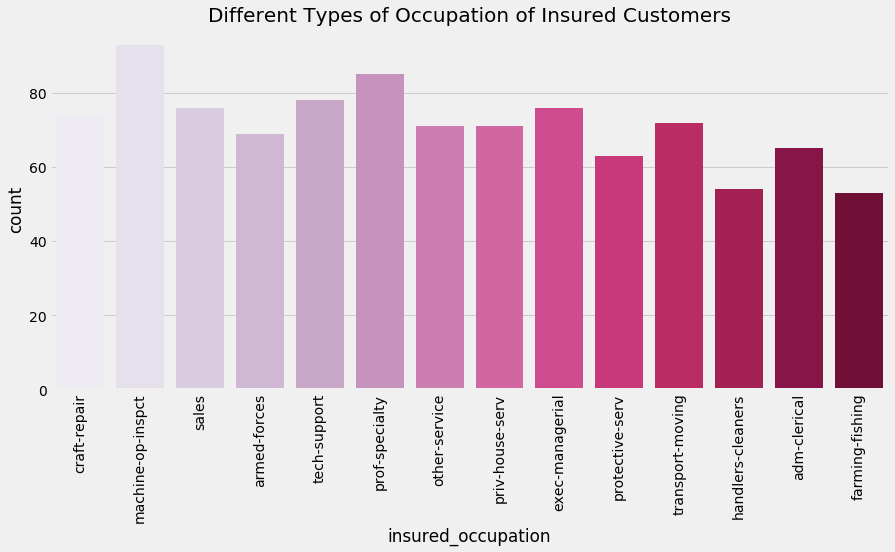

In [21]:
# breakdown of insured's occupation in insurance claims
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

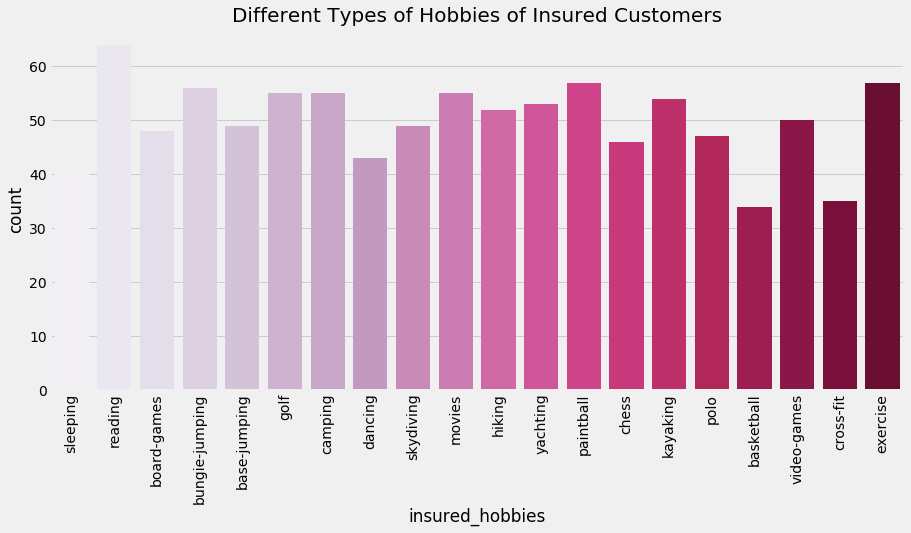

In [22]:
# breakdown of insured's hobby in insurance claims
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_hobbies'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

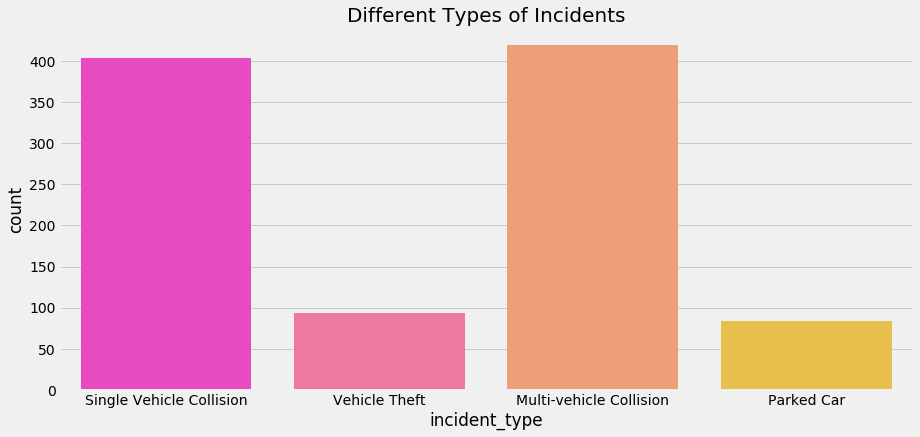

In [23]:
# breakdown of types of cases that occur in claims
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['incident_type'], palette = 'spring')
plt.tight_layout()
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

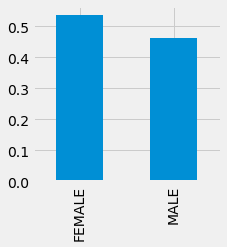

In [24]:
# breakdown of gender filing claims
plt.figure(figsize=(3,3))
plt.tight_layout()
df.insured_sex.value_counts(normalize=True).plot(kind='bar')

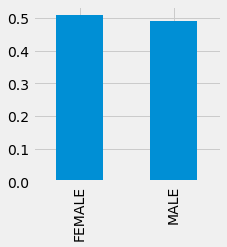

In [25]:
# breakdown of gender filing fraudulent claims
plt.figure(figsize=(3,3))
plt.tight_layout()
df[df.fraud_reported=='Y'].insured_sex.value_counts(normalize=True).plot(kind='bar')

## Initial data cleaning

#### Here, I do some basic data cleaning by replacing misleeding values, encoding the target feature as a binary integer, add columns to better represent month and year, assign car types to each model, assign gender a numeric binary, and create a timeline from policy bind date to accident

In [26]:
# replace '?' values to billed as null
df=df.replace('?',np.NaN)

In [27]:
# fill new null values
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

False

In [28]:
# double check on problematic values
np.sum(df=='?').sum()

0

In [29]:
# interpret targert variable numerically
def assign_fraud_binary(row):
    if row['fraud_reported'] == 'Y':
        return 1
    else:
        return 0

In [30]:
# assign cases of fraud a 1 and non-fraud as a zero
df['fraud_reported']=df.apply(assign_fraud_binary,axis=1)

In [31]:
# add columns for info on month and year
df['policy_bind_month']=0
df['policy_bind_year']=0
df['incident_month']=0
df['incident_year']=0

for i in range(len(df)):
    df['policy_bind_month'][i]=int(str(df.policy_bind_date[i]).split()[0][3:5])
    df['policy_bind_year'][i]= int(str(df.policy_bind_date[i]).split()[0][6:10])
    df['incident_month'][i]= int(str(df.incident_date[i]).split()[0][3:5])
    df['incident_year'][i]= int(str(df.incident_date[i]).split()[0][6:10])
    


In [32]:
# find unique auto models
df.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [33]:
# create dictionary for car type
auto_model_dict = {'RAM':'Truck','Wrangler':'SUV','Neon':'Sedan','A3':'Sedan','MDX':'SUV','Jetta':'Sedan',
                   'Passat':'Sedan','A5':'Sedan', 'legacy':'Sedan','Pathfinder':'SUV','Malibu':'Sedan',
                   'Camry':'Sedan','Forrester':'SUV','92x':'Sedan','95':'Sedan','E400':'Sedan','F150':'Truck',
                   'Grand Cherokee':'SUV','93':'Sedan','Tahoe':'SUV','Escape':'SUV','Maxima':'Sedan','X5':'SUV',
                   'Ultima':'Sedan','Civic':'Sedan','Highlander':'SUV','Silverado':'Truck','Fusion':'Sedan',
                   'ML350':'SUV','Corolla':'Sedan','TL':'Sedan','CRV':'SUV','Impreza':'Sedan','3 Series':'Sedan',
                   'C300':'Sedan','X6':'SUV','M5':'Sedan','Accord':'Sedan','RSX':'Sedan','Legacy':'Sedan',
                   'Forrestor':'SUV'
                  }

In [34]:
# map car type using the dictionary
df.auto_model=df.auto_model.map(lambda x: auto_model_dict[x])

In [35]:
# put dates in date-time format
df.policy_bind_date=pd.to_datetime(df.policy_bind_date)
df.incident_date=pd.to_datetime(df.incident_date)

In [36]:
# assign numeric value to gender
def gender_val(row):
    if row['insured_sex'] == 'MALE':
        return 1
    else:
        return 0

In [37]:
# map numeric gender value
df['insured_sex']=df.apply(gender_val,axis=1)

In [38]:
# prepare timeline variable
df['timeline']=df.incident_date-df.policy_bind_date

In [39]:
# map timeline variable
for i in range(len(df)):
    df.timeline[i] = int(str(df.timeline[i]).split()[0])
df.timeline=df.timeline.astype(int)

In [40]:
# deoict losses in absolute value
df['capital-loss']=np.abs(df['capital-loss'])

## Address categorical and numerical features

#### Here, I separate numerical from categorical and look at categorical frequncies and numerical multicolinearity

In [41]:
# create a list of some numeric features
num_list = ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [42]:
# create a list of some categorical features
cat_list = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
cat_list.append('policy_bind_year')
cat_list.append('policy_bind_month')
cat_list.append('incident_year')
cat_list.append('incident_month')

In [43]:
# show breakdown of categorical features
cat_cols = []
cat_col_vals = []
for col in cat_list[1:]:
    cat_cols.append(col) 
    cat_col_vals.append(df[col].nunique())
    print (col,df[col].nunique())

policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
property_damage 2
police_report_available 2
auto_make 14
auto_model 3
fraud_reported 2
policy_bind_year 26
policy_bind_month 12
incident_year 1
incident_month 3


<Figure size 1080x576 with 0 Axes>

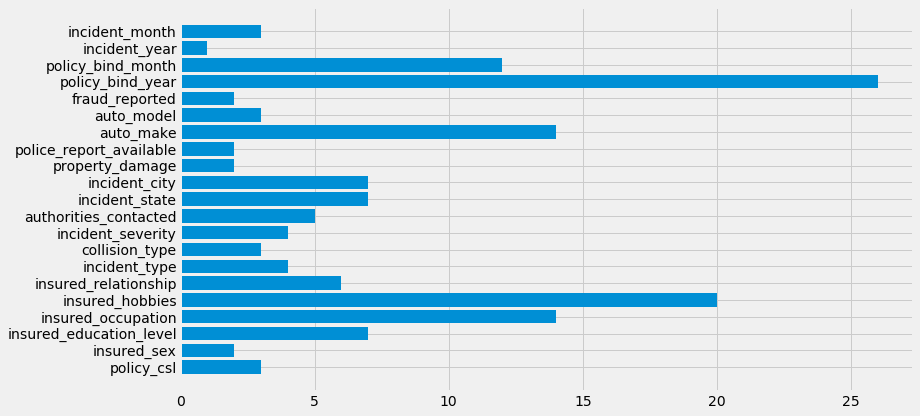

<Figure size 1080x576 with 0 Axes>

In [44]:
# graph breakdown of categorical features
plt.barh(cat_cols,cat_col_vals)
plt.tight_layout()
plt.figure(figsize=(15,8))

In [45]:
# snapshot of categorical data in a data frame
df[cat_list].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month,incident_year,incident_month
0,OH,250/500,1,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,Columbus,YES,YES,Saab,Sedan,1,2014,10,2015,1
1,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,...,Riverwood,NO,NO,Mercedes,Sedan,1,2006,6,2015,1
2,OH,100/300,0,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,Columbus,NO,NO,Dodge,Truck,0,2000,9,2015,2
3,IL,250/500,0,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,Arlington,NO,NO,Chevrolet,SUV,1,1990,5,2015,1
4,IL,500/1000,1,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,...,Arlington,NO,NO,Accura,Sedan,0,2014,6,2015,2


In [46]:
# snapshot of numerical data in a data frame
df[num_list].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,2,1,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,3,2,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,62400,5,1,2,1,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,46000,20,1,1,0,6500,1300,650,4550,2009


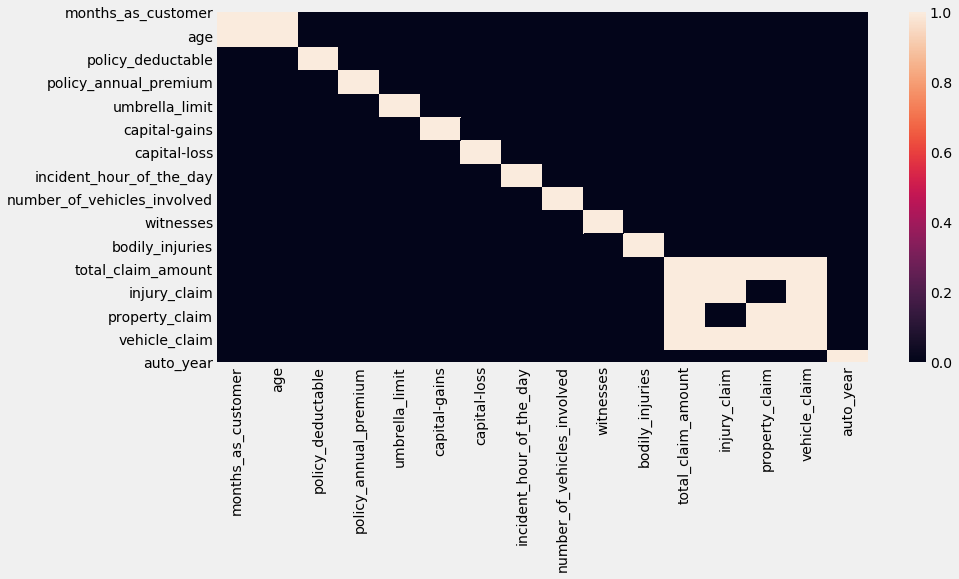

In [47]:
# heatmap of correlation between features
plt.figure(figsize=(13,6))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [48]:
# removing correlated features and updating corresponding lists
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
num_list.remove('age')
num_list.remove('total_claim_amount')
num_list.remove('vehicle_claim')
df.drop(['vehicle_claim'],axis=1,inplace=True)

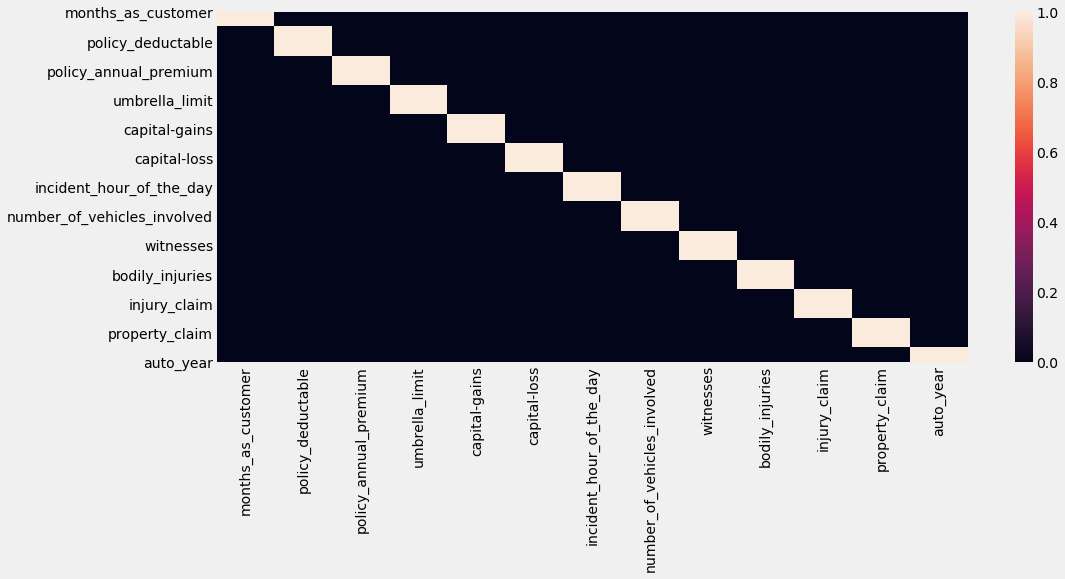

In [49]:
# double check on correlation using heatmap
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [50]:
# now that I have the timeline and month-year information, I can drop some more columns
df.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [51]:
df.head()

,months_as_customer,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_month,incident_year,timeline
0,328,521585,OH,250/500,1000,1406.91,0,466132,1,MD,...,13020,Saab,Sedan,2004,1,10,2014,1,2015,100
1,228,342868,IN,250/500,2000,1197.22,5000000,468176,1,MD,...,780,Mercedes,Sedan,2007,1,6,2006,1,2015,3130
2,134,687698,OH,100/300,2000,1413.14,5000000,430632,0,PhD,...,3850,Dodge,Truck,2007,0,9,2000,2,2015,5371
3,256,227811,IL,250/500,2000,1415.74,6000000,608117,0,PhD,...,6340,Chevrolet,SUV,2014,1,5,1990,1,2015,9260
4,228,367455,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,...,650,Accura,Sedan,2009,0,6,2014,2,2015,256


In [52]:
# updating numerical data list
num_list.append('timeline')

In [53]:
# assigning data frames based on type of data
df_num = df[num_list]
df_cat = df[cat_list]

In [54]:
# basic look of numerical data
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,46000,20,1,1,0,1300,650,2009,256


In [55]:
# basic look of numerical data
print(df_cat.shape)
df_cat.head()

(1000, 22)


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month,incident_year,incident_month
0,OH,250/500,1,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,Columbus,YES,YES,Saab,Sedan,1,2014,10,2015,1
1,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,...,Riverwood,NO,NO,Mercedes,Sedan,1,2006,6,2015,1
2,OH,100/300,0,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,Columbus,NO,NO,Dodge,Truck,0,2000,9,2015,2
3,IL,250/500,0,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,Arlington,NO,NO,Chevrolet,SUV,1,1990,5,2015,1
4,IL,500/1000,1,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,...,Arlington,NO,NO,Accura,Sedan,0,2014,6,2015,2


## Encode categorical data

#### Here, I convert numerical columns into a numeric format based on correlation with target feature

In [56]:
# find mean percent of reports where fraud occured by state where policy is held
df[['policy_state','fraud_reported']].groupby(['policy_state'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
2,OH,0.258523
1,IN,0.254839
0,IL,0.227811


In [83]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
state_dict = {'OH':1-0.259,'IN':1-0.255,'IL':1-0.228}

In [84]:
# map the dictionary to encode data
df_cat.policy_state=df.policy_state.map(lambda x: state_dict[x])

In [85]:
# find mean percent of reports where fraud occured by policy csl
df[['policy_csl','fraud_reported']].groupby(['policy_csl'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [86]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
csl_dict={'250/500':1-0.262,'100/300':1-0.258,'500/1000':1-0.217}

In [87]:
# map the dictionary to encode data
df_cat.policy_csl=df.policy_csl.map(lambda x: csl_dict[x])

In [88]:
# find mean percent of reports where fraud occured by education level
df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [89]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
education_dict={'JD':1-0.261,'MD':1-0.264,'High School':1-0.225,'Associate':1-0.234,
                'PhD':1-0.264,'College':1-0.262,'Masters':1-0.224}

In [90]:
# map the dictionary to encode data
df_cat.insured_education_level=df.insured_education_level.map(lambda x: education_dict[x])

In [91]:
# find mean percent of reports where fraud occured by occupation
df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [92]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
occupation_dict={'exec-managerial':1-0.368,'machine-op-inspct':1-0.237,'craft-repair':1-0.297,'tech-support':1-0.282,
                'sales':1-0.276,'transport-moving':1-0.292,'prof-specialty':1-0.212,'armed-forces':1-0.246,
                 'farming-fishing':1-0.302,'protective-serv':1-0.222,'other-service':1-0.169,
                 'priv-house-serv':1-0.169,'handlers-cleaners':1-0.204,'adm-clerical':1-0.169
                }

In [93]:
# map the dictionary to encode data
df_cat.insured_occupation=df.insured_occupation.map(lambda x: occupation_dict[x])

In [94]:
# find mean percent of reports where fraud occured by hobbies
df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [95]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
hobby_dict = {'chess':1-0.826,'cross-fit':1-0.743,'reading':1-0.266,'yachting':1-0.302,'board-games':1-0.292,
            'paintball':1-0.228,'base-jumping':1-0.265,'polo':1-0.277,'hiking':1-0.231,'skydiving':1-0.224,
              'exercise':1-0.193,'video-games':1-0.2,'movies':1-0.164,'bungie-jumping':1-0.161,'sleeping':1-0.195,
              'basketball':1-0.176,'golf':1-0.109,'kayaking':1-0.093,'dancing':1-0.116,'camping':1-0.091}

In [96]:
# map the dictionary to encode data
df_cat.insured_hobbies=df.insured_hobbies.map(lambda x: hobby_dict[x])

In [97]:
# find mean percent of reports where fraud occured by relationship of policy holder to that involved in incident
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
2,other-relative,0.293785
5,wife,0.270968
1,not-in-family,0.258621
4,unmarried,0.241135
3,own-child,0.213115
0,husband,0.205882


In [98]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
relate_dict={'other-relative':1-0.294,'not-in-family':1-0.259,'wife':1-0.271,
             'own-child':1-0.213,'husband':1-0.206,'unmarried':1-0.241}

In [99]:
# map the dictionary to encode data
df_cat.insured_relationship=df.insured_relationship.map(lambda x: relate_dict[x])

In [100]:
# find mean percent of reports where fraud occured by incident type
df[['incident_type','fraud_reported']].groupby(['incident_type'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
2,Single Vehicle Collision,0.290323
0,Multi-vehicle Collision,0.272076
1,Parked Car,0.095238
3,Vehicle Theft,0.085106


In [101]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
incident_dict = {'Single Vehicle Collision':1-0.29,'Multi-vehicle Collision':1-0.272,'Vehicle Theft':1-0.085,
                 'Parked Car':1-0.095}

In [102]:
# map the dictionary to encode data
df_cat.incident_type=df.incident_type.map(lambda x: incident_dict[x])

In [103]:
# find mean percent of reports where fraud occured by collision type
df[['collision_type','fraud_reported']].groupby(['collision_type'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
0,Front Collision,0.275591
2,Side Collision,0.253623
1,Rear Collision,0.227660


In [104]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
collision_dict = {'Rear Collision':1-0.312,'Front Collision':1-0.276,'Side Collision':1-0.254}

In [105]:
# map the dictionary to encode data
df_cat.collision_type=df.collision_type.map(lambda x: collision_dict[x])

In [106]:
# find mean percent of reports where fraud occured by incident severity
df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
0,Major Damage,0.605072
2,Total Loss,0.128571
1,Minor Damage,0.107345
3,Trivial Damage,0.066667


In [107]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
severity_dict={'Major Damage':1-0.605,'Minor Damage':1-0.107,'Total Loss':1-0.129,'Trivial Damage':1-0.067}

In [108]:
# map the dictionary to encode data
df_cat.incident_severity=df.incident_severity.map(lambda x: severity_dict[x])

In [109]:
# find mean percent of reports where fraud occured based on who was contacted
df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


In [110]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
authority_dict={'Other':1-0.318,'Police':1-0.209,'Fire':1-0.269,'Ambulance':1-0.291,'None':1-0.066}

In [111]:
# map the dictionary to encode data
df_cat.authorities_contacted=df.authorities_contacted.map(lambda x: authority_dict[x])

In [112]:
# find mean percent of reports where fraud occured by incident state
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [113]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
inc_state_dict = {'SC':1-0.294,'NY':1-0.221,'WV':1-0.18,'NC':1-0.309,'VA':1-0.227,'OH':1-0.435,'PA':1-0.267}

In [114]:
# map the dictionary to encode data
df_cat.incident_state=df.incident_state.map(lambda x: inc_state_dict[x])

In [115]:
# find mean percent of reports where fraud occured by city
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [116]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
inc_city_dict = {'Arlington':1-0.29,'Columbus':1-0.262,'Springfield':1-0.242,'Hillsdale':1-0.248,
                 'Northbend':1-0.234,'Riverwood':1-0.224,'Northbrook':1-0.221}

In [117]:
# map the dictionary to encode data
df_cat.incident_city=df.incident_city.map(lambda x: inc_city_dict[x])

In [118]:
# find mean percent of reports where fraud occured by pressence of property damage
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,YES,0.258278
0,NO,0.242120


In [119]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
prop_dam_dict = {'YES':1-0.258,'NO':1-0.242}

In [120]:
# map the dictionary to encode data
df_cat.property_damage = df.property_damage.map(lambda x: prop_dam_dict[x])

In [121]:
# find mean percent of reports where fraud occured by pressence of polic report
df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
0,NO,0.255102
1,YES,0.229299


In [122]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
police_report_dict = {'YES':1-0.229,'NO':1-0.255}

In [123]:
# map the dictionary to encode data
df_cat.police_report_available=df.police_report_available.map(lambda x: police_report_dict[x])

In [124]:
# find mean percent of reports where fraud occured by car brand involved
df[['auto_make','fraud_reported']].groupby(['auto_make'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [125]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
brand_dict={'Mercedes':1-0.338,'Ford':1-0.306,'Audi':1-0.304,'Chevrolet':1-0.276,'Dodge':1-0.25,'BMW':1-0.278,
            'Volkswagen':1-0.279,'Suburu':1-0.238,'Saab':1-0.225,'Nissan':1-0.179,'Honda':1-0.255,'Accura':1-0.191,
            'Toyota':1-0.186,'Jeep':1-0.164}

In [126]:
# map the dictionary to encode data
df_cat.auto_make=df.auto_make.map(lambda x: brand_dict[x])

In [127]:
# find mean percent of reports where fraud occured by car type
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
2,Truck,0.358696
0,SUV,0.247588
1,Sedan,0.229481


In [128]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
model_df={'Sedan':1-0.229,'SUV':1-0.248,'Truck':1-0.359}

In [129]:
# map the dictionary to encode data
df_cat.auto_model=df.auto_model.map(lambda x: model_df[x])

In [130]:
# find mean percent of reports where fraud occured by incident month
df[['policy_bind_month','fraud_reported']].groupby(['policy_bind_month'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_bind_month,fraud_reported
4,5,0.318841
9,10,0.307692
1,2,0.300000
6,7,0.296703
3,4,0.289157
10,11,0.270588
5,6,0.262500
2,3,0.215190
0,1,0.204819
8,9,0.202703


In [131]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
policy_month_dict = {5:1-0.319,10:1-0.308,2:1-0.3,7:1-0.297,4:1-0.289,11:1-0.271,6:1-0.263,3:1-0.215,
                  1:1-0.205,9:1-0.203,8:1-0.172,12:1-0.147}

In [132]:
# map the dictionary to encode data
df_cat.policy_bind_month=df.policy_bind_month.map(lambda x: policy_month_dict[x])

In [133]:
# find mean percent of reports where fraud occured by incident year
df[['policy_bind_year','fraud_reported']].groupby(['policy_bind_year'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_bind_year,fraud_reported
22,2012,0.388889
8,1998,0.333333
13,2003,0.324324
4,1994,0.317073
18,2008,0.303030
12,2002,0.300000
9,1999,0.275000
7,1997,0.272727
5,1995,0.256410
6,1996,0.255814


In [134]:
# create dictionary based on above results
# subtract from one to encode frequency of non-fraud
policy_year_dict={2012:1-0.389,1998:1-0.333,2003:1-0.324,1994:1-0.317,2008:1-0.303,2002:1-0.3,1999:1-0.275,
               1997:1-0.273,1995:1-0.256,1996:1-0.256,2014:1-0.256,2004:1-0.25,1993:1-0.242,1991:1-0.236,2013:1-0.229,
               2007:1-0.225,2001:1-0.22,2006:1-0.22,
              2011:1-0.219,1990:1-0.208,1992:1-0.208,2009:1-0.186,2010:1-0.184,2005:1-0.175,2000:1-0.129,2015:1-0}

In [135]:
# map the dictionary to encode data
df_cat.policy_bind_year=df.policy_bind_year.map(lambda x: policy_year_dict[x])

In [136]:
#csl_df = pd.get_dummies(df_cat.policy_csl,drop_firshobby_dicte)
#csl_df.head(1)

In [137]:
#education_df = pd.get_dummies(df_cat.insured_education_level,drop_first=True)

In [138]:
#occupation_df = pd.get_dummies(df_cat.insured_occupation,drop_first=True)

In [139]:
#hobbies_df =pd.get_dummies(df_cat.insured_hobbies,drop_first=True)

In [140]:
#relationship_df=pd.get_dummies(df_cat.insured_relationship,drop_first=True)

In [141]:
#incident_type_df=pd.get_dummies(df_cat.incident_type,drop_first=True)

In [142]:
#collision_df=pd.get_dummies(df_cat.collision_type,drop_first=True)

In [143]:
#severity_df=pd.get_dummies(df_cat.incident_severity,drop_first=True)

In [144]:
#authorities_df=pd.get_dummies(df_cat.authorities_contacted,drop_first=True)

In [145]:
#state_df=pd.get_dummies(df_cat.incident_state,drop_first=True)

In [146]:
#city_df=pd.get_dummies(df_cat.incident_city,drop_first=True)

In [147]:
#pd_df=pd.get_dummies(df_cat.property_damage,drop_first=True,prefix='prop_dam')
#pd_df.drop('prop_dam_NO',axis=1,inplace=True)
#pd_df.head(1)

In [148]:
#pra_df =state_df=pd.get_dummies(df_cat.police_report_available,drop_first=True,prefix='police_report')
#pra_df.drop('police_report_NO',axis=1,inplace=True)
#pra_df.head(1)

In [149]:
#make_df =state_df=pd.get_dummies(df_cat.auto_make,drop_first=True)

In [150]:
#model_df=state_df=pd.get_dummies(df_cat.auto_model,drop_first=True)

In [151]:
#dum_df_list=[csl_df,education_df,occupation_df,hobbies_df,relationship_df,incident_type_df,collision_df,severity_df,authorities_df,state_df,city_df,pd_df,pra_df,make_df]

In [152]:
#for dfr in dum_df_list:
#    for col in dfr.columns:
#        df_cat[col]=dfr[col]

In [153]:
#df_cat.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [158]:
## having changed the format by adding new columns, I no longer need these features
df_cat.drop(['incident_month','incident_year'],axis=1,inplace=True)

In [ ]:
# print a look at the new data frame for categorical data
print(df_cat.shape)
df_cat.head()

In [155]:
#for col in df_num.columns:
#    df_num[col] = ss.fit_transform(df_num[[col]])

In [156]:
#for col in df_num.columns:
#    df_num[col]=list(stats.boxcox(abs(df_num[col]+0.5)))[0]

## Combine data frames and revisit correlation

#### Here, I combine categorical features (now converted) with numerical and remove any remaining correlation

In [159]:
# revisit numerical data
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,46000,20,1,1,0,1300,650,2009,256


In [160]:
# copy numerical data and add categorical data
df_atg = df_num.copy()
for col in df_cat.columns:
    df_atg[col]=df_cat[col]

In [161]:
# data frame all together (with categorical-encoded and numerical)
print(df_atg.shape)
df_atg.head()

(1000, 34)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,...,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month
0,328,1000,1406.91,0,53300,0,5,1,2,1,...,0.791,0.706,0.738,0.742,0.771,0.775,0.771,1,0.744,0.692
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0.791,0.773,0.776,0.758,0.745,0.662,0.771,1,0.780,0.737
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,...,0.791,0.779,0.738,0.758,0.745,0.750,0.641,0,0.871,0.797
3,256,2000,1415.74,6000000,48900,62400,5,1,2,1,...,0.791,0.565,0.710,0.758,0.745,0.724,0.752,1,0.792,0.681
4,228,1000,1583.91,6000000,66000,46000,20,1,1,0,...,0.934,0.779,0.710,0.758,0.745,0.809,0.771,0,0.744,0.737


In [162]:
# look at breakdown of target feature
round(df_atg.fraud_reported.value_counts(normalize=True),2)

0    0.75
1    0.25
Name: fraud_reported, dtype: float64

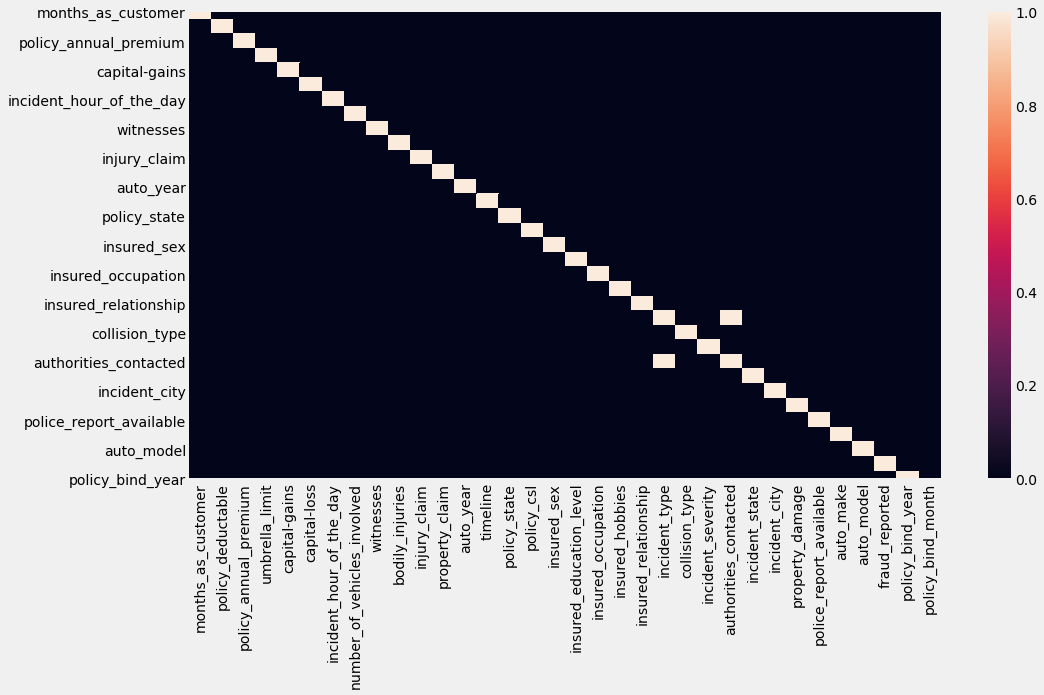

In [163]:
# revisit correlation
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df_atg.corr()>=0.7)

In [164]:
# remove new correlation with encoded categorical features
df_atg.drop(['incident_type'],axis=1,inplace=True)

## RFE

#### Here, I systematically remove features that do not matter that much

In [165]:
# split data into inputs and output
X = df_atg.drop('fraud_reported',axis=1)
y = df_atg.fraud_reported

In [166]:
# import libraries needed to remove un-needed features
from sklearn.feature_selection import rfe
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [167]:
# use random forest classifier to pick most important features based on the data
rfc = RandomForestClassifier(random_state=seed)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(8), scoring='accuracy',min_features_to_select=12)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=14,
                                       verbose=0, warm_start=False),
      min_features_to_select=12, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [168]:
# assign support
support_list = list(rfecv.support_)

In [169]:
# create a list of most important features
importance = []
for val, sup in list(zip(X.columns,support_list)):
    if sup == True:
        importance.append(val)

In [170]:
# view X in the context of most important features
print(X[importance].shape)
X[importance].head()

(1000, 21)


,months_as_customer,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,timeline,...,insured_occupation,insured_hobbies,insured_relationship,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,policy_bind_year,policy_bind_month
0,328,1406.91,53300,0,5,2,6510,13020,2004,100,...,0.703,0.805,0.794,0.395,0.791,0.706,0.738,0.775,0.744,0.692
1,228,1197.22,0,0,8,0,780,780,2007,3130,...,0.763,0.734,0.706,0.893,0.791,0.773,0.776,0.662,0.780,0.737
2,134,1413.14,35100,0,7,3,7700,3850,2007,5371,...,0.724,0.708,0.787,0.893,0.791,0.779,0.738,0.750,0.871,0.797
3,256,1415.74,48900,62400,5,2,6340,6340,2014,9260,...,0.754,0.708,0.759,0.395,0.791,0.565,0.710,0.724,0.792,0.681
4,228,1583.91,66000,46000,20,1,1300,650,2009,256,...,0.724,0.708,0.759,0.893,0.934,0.779,0.710,0.809,0.744,0.737


In [171]:
# combine y and the reduced x
x_and_y = pd.concat([X[importance],df_atg.fraud_reported],axis=1)

In [172]:
# look at shape of x with y
x_and_y.shape

(1000, 22)

In [173]:
# filter outliers of the combined data
x_and_y = x_and_y[(np.abs(stats.zscore(x_and_y)) <= 2.5).all(axis=1)]
print(x_and_y.shape)
x_and_y.head()

(755, 22)


,months_as_customer,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,timeline,...,insured_hobbies,insured_relationship,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,policy_bind_year,policy_bind_month,fraud_reported
0,328,1406.91,53300,0,5,2,6510,13020,2004,100,...,0.805,0.794,0.395,0.791,0.706,0.738,0.775,0.744,0.692,1
1,228,1197.22,0,0,8,0,780,780,2007,3130,...,0.734,0.706,0.893,0.791,0.773,0.776,0.662,0.780,0.737,1
2,134,1413.14,35100,0,7,3,7700,3850,2007,5371,...,0.708,0.787,0.893,0.791,0.779,0.738,0.750,0.871,0.797,0
5,256,1351.10,0,0,19,2,6410,6410,2003,2975,...,0.839,0.759,0.395,0.731,0.706,0.710,0.775,0.780,0.692,1
7,165,1137.03,0,0,23,2,9380,9380,2015,9128,...,0.735,0.759,0.871,0.791,0.773,0.738,0.696,0.792,0.700,0


## Assign X and Y

#### Here, I split my data into predictive features and the target feature

In [174]:
# having removed outliers, I will now split x and y again

#X = df_atg.drop('fraud_reported',axis=1)
X = x_and_y[importance]
#y = df_atg.fraud_reported
y = x_and_y.fraud_reported

In [175]:
# check values for scaling purposes
np.sum(X>1)

months_as_customer          752
policy_annual_premium       755
capital-gains               372
capital-loss                387
incident_hour_of_the_day    696
witnesses                   370
injury_claim                737
property_claim              739
auto_year                   755
timeline                    755
insured_education_level       0
insured_occupation            0
insured_hobbies               0
insured_relationship          0
incident_severity             0
authorities_contacted         0
incident_state                0
incident_city                 0
auto_make                     0
policy_bind_year              0
policy_bind_month             0
dtype: int64

In [177]:
# normalize data
for col in X.columns:
    X[col]=list(stats.boxcox(abs(X[col]+0.01)))[0]

In [178]:
# Min-Max scale some data
for col in X.columns:
    if (X[col]>=1).sum() >0:
        X[col] = scaler.fit_transform(X[[col]])

## Train-Test-Split

#### Here, I split my data into a set for which to base my model on and another set to validate on

In [179]:
# import library to split up data
from sklearn.model_selection import train_test_split

In [180]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.3)

In [181]:
# get a look at the new data created
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(227, 21) (528, 21) (227,) (528,)


## PCA

#### Here, I use principal component analysis to reduce extra features from my data set and reduce dimensionality

In [ ]:
# SKIP

In [493]:
for col in scale_list:
    X_train[col] = ss.fit_transform(X_train[[col]])

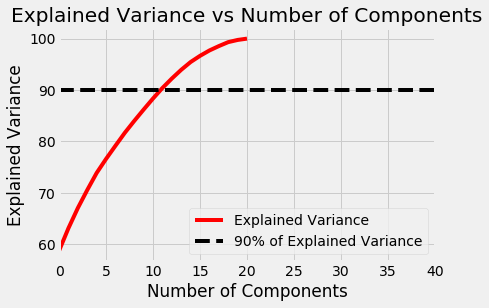

In [494]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,40)
plt.legend(loc='best');

In [495]:
print('16 components')

16 components


In [496]:
pca_fraud = PCA(n_components=16)

In [497]:
X_train_pca = pd.DataFrame(pca_fraud.fit_transform(X_train))

In [498]:
X_test_pca = pd.DataFrame(pca_fraud.transform(X_test))

In [499]:
print(X_train_pca.shape)
X_train_pca.head()

(854, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.369517,0.076528,-0.108555,-0.280153,0.133642,-0.050071,-0.109472,0.238819,-0.498317,-0.282951,-0.178044,0.198532,0.050416,0.069594,-0.030591,-0.025693
1,-1.456474,0.089992,0.446953,0.211063,-0.293237,0.185950,0.752738,-0.193956,0.025480,-0.247161,0.033635,0.367246,0.194691,-0.144548,0.030643,0.267107
2,1.474372,0.317334,-0.145689,-0.768169,-0.402706,-0.218942,0.497470,0.150038,0.033822,0.399606,-0.207156,-0.155983,0.253660,-0.002360,-0.174576,0.185357
3,-1.440737,-0.106058,0.491580,-0.240172,0.117739,-0.236653,0.070937,-0.257857,-0.332439,-0.500766,0.223284,0.006970,-0.295320,-0.110882,0.036230,0.021730
4,1.320909,0.094142,-0.456013,-0.023886,-0.002980,-0.017495,-0.556444,-0.372336,-0.280763,-0.018265,0.199321,-0.213137,-0.174735,0.019842,0.156424,-0.132438


In [169]:
train_pca = X_train_pca.copy()
train_pca['fraud_reported']=y_train

In [105]:
train_pca.iloc[:,0:11].columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [107]:
print(train_pca.shape)
train_pca.head()

(750, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,fraud_reported
0,6.596872,2.033141,1.118117,-1.022252,0.439050,0.978212,-1.401038,-1.729632,-1.837104,-1.184848,-1.542432,-0.374773,0.105695,-1.375801,-0.952515,0.044643,1.0
1,2.120963,0.459084,3.102679,-0.971966,-0.444694,0.514816,-0.662833,0.163503,0.067729,0.064168,-0.358295,2.042058,0.423713,-0.038670,-1.499511,0.802787,NaN
2,2.506634,-0.329361,-0.226529,0.687583,0.450847,-1.132362,0.221251,-0.761652,-0.571302,-1.001994,0.487037,-1.447564,0.713663,0.210165,-1.883463,-0.032908,0.0
3,6.477487,0.826757,0.327397,1.676297,0.792291,-1.373340,0.277223,-0.341874,-0.469388,-0.850038,-0.290767,0.484199,0.526399,0.351893,0.601154,0.317039,NaN
4,6.065953,0.983724,2.259741,-0.285819,0.093663,0.549534,0.328764,-0.293713,0.500580,-1.163064,0.365664,-0.286016,1.777729,-0.403436,-0.439012,0.204672,0.0


In [108]:
X_train_pca = train_pca.drop('fraud_reported',axis=1)
y_train_pca = train_pca['fraud_reported']

In [109]:
X_test_pca = X_test_pca
y_test_pca = y_test

In [110]:
print('Do shapes match?')
print(X_test_pca.shape[0]==y_test_pca.shape[0])
print(X_train_pca.shape[0]==y_train_pca.shape[0])

Do shapes match?
True
True


## Address imbalance in target feature

#### Here, I balance my data based on target variable to have more meaningful models and results

In [182]:
# combine data again to artificially balance data
training  = pd.concat([X_train, y_train], axis=1)

In [183]:
#training  = pd.concat([X_train_pca, y_train_pca], axis=1)
#X_test=X_test_pca
#y_test=y_test_pca

In [184]:
# look at current breakdown of target feature
round(training.fraud_reported.value_counts(),2)

0    427
1    101
Name: fraud_reported, dtype: int64

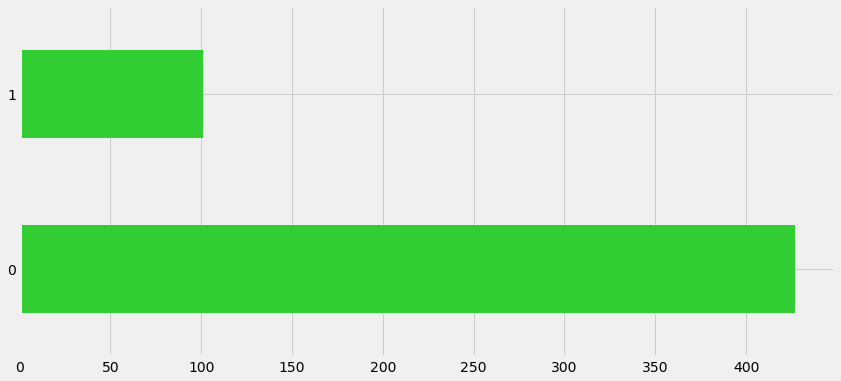

In [185]:
# visualize imbalance of data
plt.tight_layout()
round(training.fraud_reported.value_counts(normalize=False),2).plot(kind='barh',color='limegreen')

In [186]:
# import library to up and down -sample
from sklearn.utils import resample

In [187]:
# split data into cases of fraud and non-fraud
true = training[training.fraud_reported==0]
fraud = training[training.fraud_reported==1]

In [188]:
# downsample to fit the minority class
fraud_downsampled = resample(true,
                                replace = False,
                                n_samples = len(fraud), 
                                random_state = seed) 

In [189]:
# combine data
downsampled = pd.concat([fraud, fraud_downsampled])

In [190]:
# view breakdown of downsampled data
downsampled.fraud_reported.value_counts()

1    101
0    101
Name: fraud_reported, dtype: int64

In [191]:
# upsample to fit the majority class
fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(true),
                          random_state=seed)

In [192]:
# combine data
upsampled = pd.concat([true, fraud_upsampled])

In [193]:
# view breakdown of target feature
upsampled.fraud_reported.value_counts()

1    427
0    427
Name: fraud_reported, dtype: int64

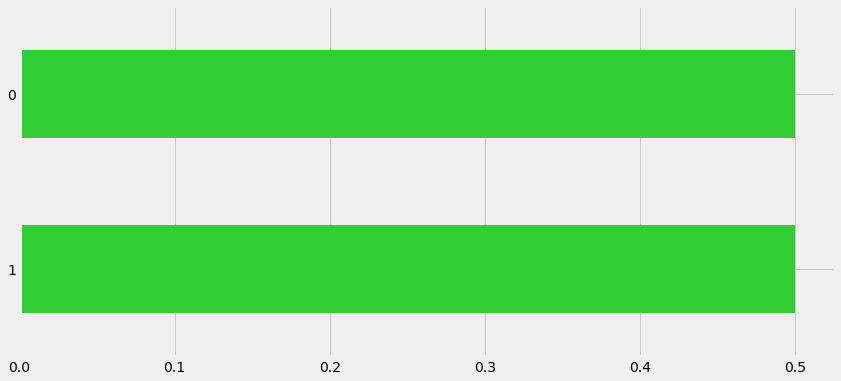

In [194]:
# visualize new balance
plt.tight_layout()
round(upsampled.fraud_reported.value_counts(normalize=True),2).plot(kind='barh',color='limegreen')

In [195]:
# show new balanced data
print(upsampled.shape)
upsampled.head()

(854, 22)


,months_as_customer,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,timeline,...,insured_hobbies,insured_relationship,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,policy_bind_year,policy_bind_month,fraud_reported
931,0.404838,0.513601,0.896260,0.971640,0.679195,0.578043,0.516000,0.000000,0.233046,0.388691,...,-0.212213,-0.190813,-0.103600,-0.436976,-0.208482,-0.061059,-0.177096,-0.209312,-0.351804,0
68,0.415718,0.341039,0.955323,0.976874,0.488294,1.000000,0.780751,0.505104,0.091932,0.846610,...,-0.172323,-0.197425,-0.288324,-0.500640,-0.148401,-0.060297,-0.320464,-0.295069,-0.661003,0
134,0.336089,0.804063,0.979740,0.976267,0.781953,0.578043,0.947967,0.617369,0.527229,0.468045,...,-0.187526,-0.223722,-0.086668,-0.500640,-0.148401,-0.060608,-0.289624,-0.161698,-0.319261,0
249,0.338491,0.311342,0.000000,0.961558,0.878580,1.000000,0.529161,0.513886,0.280956,0.585083,...,-0.257004,-0.272825,-0.288324,-0.436976,-0.233891,-0.061314,-0.287275,-0.279411,-0.351804,0
777,0.629828,0.672644,0.000000,0.000000,0.909658,0.000000,0.525771,0.510483,0.378110,0.505299,...,-0.251439,-0.197425,-0.103600,-0.292128,-0.233891,-0.060763,-0.257039,-0.232859,-0.537337,0


In [196]:
# split data again
y_train = upsampled.fraud_reported
X_train = upsampled.drop('fraud_reported', axis=1)

In [197]:
# check that data lines up
print('Do shapes match?')
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

Do shapes match?
(227, 21)
(227,)
(854, 21)
(854,)


## Scale and transform

#### Here, I take one last step before models to keep all variables at the same scale and to normalize their distributions

In [198]:
#for col in X_train:
#    X_train[col] = scaler.fit_transform(X_train[[col]])

In [199]:
#for col in X_train.columns:
#    X_train[col]=list(stats.boxcox(abs(X_train[col]+0.5)))[0]

## Initial models and grid search

#### Here, I import the packages needed for modeling

In [200]:
# just to avoid getting annoying warnings
import warnings
warnings.filterwarnings(action='ignore')

In [201]:
# import necessary libraries

# grid search
from sklearn.model_selection import GridSearchCV

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from imblearn.ensemble import BalancedRandomForestClassifier 

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

Using TensorFlow backend.


#### Here, I start by checking my results from training data

In [202]:
# Logistic Regression
# This model attempts to build a curve to accurately predict binary values based on proximity to points on the curve
# instantiate a logistic regression model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
logreg = LogisticRegression(C=27825,random_state=seed,penalty='l2',dual=False,fit_intercept=True,multi_class='auto',
                            solver='liblinear')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
p_score_lr = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_lr = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_lr = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_log}, Precision: {p_score_lr}, Recall: {r_score_lr}, f1-score:{f1_lr}')
print(confusion_matrix(y_train, Y_pred))

Score: 87.35, Precision: 86.5, Recall: 88.52, f1-score:87.5
[[368  59]
 [ 49 378]]


In [203]:
# Support Vector Machine
# this model attempts to use a dividing line as a boundary between two different classes and predicts based on the boundary
# instantiate a support vector machine model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
svc = SVC(random_state=seed,C=10,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
p_score_svc = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_svc = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_svc = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_svc}, Precision: {p_score_svc}, Recall: {r_score_svc} F1-Score {f1_svc}')
print(confusion_matrix(y_train, Y_pred))

Score: 84.78, Precision: 85.11, Recall: 84.31 F1-Score 84.71
[[364  63]
 [ 67 360]]


In [204]:
# kNN
# this model attempts to classify points based on their proximity to other possibly similar points
# instantiate a k-nearest neighbors model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance',metric='manhattan',algorithm='ball_tree')
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
p_score_knn = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_knn = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_knn = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_knn}, Precision: {p_score_knn}, Recall: {r_score_knn} F1-Score {f1_knn}')
print(confusion_matrix(y_train, Y_pred))

Score: 100.0, Precision: 100.0, Recall: 100.0 F1-Score 100.0
[[427   0]
 [  0 427]]


In [205]:
## GNB
# Support Vector Machine
# this model attempts to use a dividing line as a boundary between two different classes and predicts based on the boundary
# instantiate a support vector machine model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
p_score_gnb = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_gnb = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_gnb = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_gaussian}, Precision: {p_score_gnb}, Recall: {r_score_gnb} F1-Score {f1_gnb}')
print(confusion_matrix(y_train, Y_pred))

Score: 84.66, Precision: 85.07, Recall: 84.07 F1-Score 84.57
[[364  63]
 [ 68 359]]


In [206]:
# Linear SVC
# this model attempts to classify points based on a conditional probability formula
# instantiate a gaussian naive bayes model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
linear_svc = LinearSVC(C=100,random_state=seed,penalty='l1',dual=False,loss='squared_hinge')
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
p_score_lsvc = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_lsvc = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_lsvc = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_linear_svc}, Precision: {p_score_lsvc}, Recall: {r_score_lsvc} F1-Score {f1_lsvc}')
print(confusion_matrix(y_train, Y_pred))

Score: 86.53, Precision: 85.78, Recall: 87.59 F1-Score 86.67
[[365  62]
 [ 53 374]]


In [207]:
# Stochastic Gradient Descent
# this model attempts to classify points based on a loss function designed to approach the minimal error
# instantiate a stochastic gradient descent model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
sgd = SGDClassifier(random_state=seed,penalty='l2',fit_intercept=True)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
p_score_sgd = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_sgd = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_sgd = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_sgd}, Precision: {p_score_sgd}, Recall: {r_score_sgd} F1-Score {f1_sgd}')
print(confusion_matrix(y_train, Y_pred))

Score: 86.42, Precision: 83.3, Recall: 91.1 F1-Score 87.02
[[349  78]
 [ 38 389]]


In [208]:
# Decision Tree
# this model attempts to classify points based on decision trees
# instantiate a decision tree model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
decision_tree = DecisionTreeClassifier(max_depth=9,random_state=seed,min_samples_leaf=1)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
p_score_dt = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_dt = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_dt = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_decision_tree}, Precision: {p_score_dt}, Recall: {r_score_dt} F1-Score {f1_dt}')
print(confusion_matrix(y_train, Y_pred))

Score: 98.83, Precision: 97.71, Recall: 100.0 F1-Score 98.84
[[417  10]
 [  0 427]]


In [209]:
# Random Forest
# this model attempts to classify points based on a lot of random decision trees
# instantiate a random forest model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
random_forest = RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                                       random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_train)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
p_score_rf = round(precision_score(y_train,Y_pred,average='binary')*100,2)
r_score_rf = round(recall_score(y_train,Y_pred,average='binary')*100,2)
f1_rf = round(f1_score(y_train,Y_pred,average='binary')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score_rf}, Recall: {r_score_rf} F1-Score {f1_rf}')
print(confusion_matrix(y_train, Y_pred))

Score: 100.0, Precision: 100.0, Recall: 100.0 F1-Score 100.0
[[427   0]
 [  0 427]]


In [210]:
# XGBoost
# instantiate a xgboost model with certain parameters
# fit model on train data
# calculate metrics based on evaluation of training data
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=140)
model.fit(X_train, y_train)
Y_pred = model.predict(X_train)
predictions = [round(value) for value in Y_pred]
acc_xg = round(accuracy_score(y_train,Y_pred),2)*100
p_xg = round(precision_score(y_train,Y_pred),2)*100
r_xg = round(recall_score(y_train,Y_pred),2)*100
f1_xg = (round(f1_score(y_train,Y_pred),2))*100
print(f'Score: {acc_xg}, Precision: {p_xg}, Recall: {r_xg} F1-Score {f1_xg}')
print(confusion_matrix(y_train, Y_pred))

Score: 100.0, Precision: 100.0, Recall: 100.0 F1-Score 100.0
[[427   0]
 [  0 427]]


#### Training data summary

In [211]:
# create data frames to summarize findings
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_sgd, acc_linear_svc, acc_decision_tree, acc_xg]})
models = models.sort_values(by='Score', ascending=False).T
precision_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoost'],
    'Precision': [p_score_svc, p_score_knn, p_score_lr, p_score_rf, p_score_gnb, p_score_sgd, p_score_lsvc, p_score_dt,p_xg]})
precision_df = precision_df.sort_values(by='Precision', ascending=False).T
recall_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoost'],
    'Recall': [r_score_svc, r_score_knn, r_score_lr, r_score_rf, r_score_gnb, r_score_sgd, r_score_lsvc, r_score_dt,r_xg]})
recall_df = recall_df.sort_values(by='Recall', ascending=False).T
f1_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGB oost'],
    'F1-Score': [f1_svc, f1_knn, f1_lr, f1_rf, f1_gnb, f1_sgd, f1_lsvc, f1_dt,f1_xg]})
f1_df = f1_df.sort_values(by='F1-Score', ascending=False).T

In [212]:
models

,1,3,8,7,2,6,5,0,4
Model,KNN,Random Forest,XGBoost,Decision Tree,Logistic Regression,Linear SVC,Stochastic Gradient Decent,Support Vector Machines,Naive Bayes
Score,100,100,100,98.83,87.35,86.53,86.42,84.78,84.66


In [213]:
precision_df

,1,3,8,7,2,6,0,4,5
Model,KNN,Random Forest,XGBoost,Decision Tree,Logistic Regression,Linear SVC,Support Vector Machines,Naive Bayes,Stochastic Gradient Decent
Precision,100,100,100,97.71,86.5,85.78,85.11,85.07,83.3


In [214]:
recall_df

,1,3,7,8,5,2,6,0,4
Model,KNN,Random Forest,Decision Tree,XGBoost,Stochastic Gradient Decent,Logistic Regression,Linear SVC,Support Vector Machines,Naive Bayes
Recall,100,100,100,100,91.1,88.52,87.59,84.31,84.07


In [215]:
f1_df

,1,3,8,7,2,5,6,0,4
Model,KNN,Random Forest,XGB oost,Decision Tree,Logistic Regression,Stochastic Gradient Decent,Linear SVC,Support Vector Machines,Naive Bayes
F1-Score,100,100,100,98.84,87.5,87.02,86.67,84.71,84.57


#### Here, I validate my training results on test data

In [189]:
## Logistic Regression grid search for optimal parameters
grid={"C":np.logspace(-10,10,20), "penalty":["l1","l2"],'dual':[False,True],'fit_intercept':[True,False],
      'multi_class':['auto','ovr','multinomial']}
logreg=LogisticRegression(random_state=seed)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 37.92690190732238, 'dual': False, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'l2'}
accuracy : 0.8712859097127224


In [216]:
# Logistic Regression
logreg = LogisticRegression(C=27825,random_state=seed,penalty='l2',dual=False,fit_intercept=True,multi_class='auto',
                           solver='liblinear')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
p_score_lr = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_lr = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_lr = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_log}, Precision: {p_score_lr}, Recall: {r_score_lr}, f1-score:{f1_lr}')
print(confusion_matrix(y_test, Y_pred))

Score: 80.18, Precision: 52.05, Recall: 79.17, f1-score:62.81
[[144  35]
 [ 10  38]]


In [217]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7980679702048417 [2 1 0]


In [192]:
## Support Vector Machine grid search for optimal parameters
from sklearn.model_selection import GridSearchCV  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
grid = GridSearchCV(SVC(random_state=seed), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.620, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.724, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.573, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.596, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.9s finished


In [218]:
# Support Vector Machine
svc = SVC(random_state=seed,C=10,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
p_score_svc = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_svc = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_svc = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_svc}, Precision: {p_score_svc}, Recall: {r_score_svc} F1-Score {f1_svc}')
print(confusion_matrix(y_test, Y_pred))

Score: 81.5, Precision: 54.17, Recall: 81.25 F1-Score 65.0
[[146  33]
 [  9  39]]


In [219]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.8140712290502794 [2 1 0]


In [195]:
## KNN grid search for optimal parameters
grid_params = {'n_neighbors':[3,5,7,9,11,13],'weights':['uniform','distance'],'metric':['euclidean','manhattan','minkowski']}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv = 5,n_jobs = -1)
gs_results = gs.fit(X_train,y_train)
print(gs.best_score_)
print('')
print(gs.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8267561059511526

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.5s finished


In [220]:
# kNN
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance',metric='manhattan',algorithm='ball_tree')
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
p_score_knn = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_knn = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_knn = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_knn}, Precision: {p_score_knn}, Recall: {r_score_knn} F1-Score {f1_knn}')
print(confusion_matrix(y_test, Y_pred))

Score: 70.93, Precision: 36.76, Recall: 52.08 F1-Score 43.1
[[136  43]
 [ 23  25]]


In [221]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6403049348230913 [2 1 0]


In [198]:
# Gaussian Naive Bayes GS

In [222]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
p_score_gnb = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_gnb = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_gnb = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_gaussian}, Precision: {p_score_gnb}, Recall: {r_score_gnb} F1-Score {f1_gnb}')
print(confusion_matrix(y_test, Y_pred))

Score: 81.06, Precision: 53.52, Recall: 79.17 F1-Score 63.87
[[146  33]
 [ 10  38]]


In [223]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.8036545623836127 [2 1 0]


In [201]:
## Linear SVC grid search for optimal parameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'penalty': ['l1','l2'],'dual':[True,False],}  
grid = GridSearchCV(LinearSVC(random_state=seed), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] .......... C=0.1, dual=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] .......... C=0.1, dual=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] .......... C=0.1, dual=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] .......... C=0.1, dual=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] .......... C=0.1, dual=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, dual=True, penalty=l2 ....................................
[CV] ........ C=0.1, dual=True, penalty=l2, score=0.789, total=   0.0s
[CV] C=0.1, dual=True, penalty=l2 ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [224]:
# Linear SVC

linear_svc = LinearSVC(C=100,random_state=seed,penalty='l1',dual=False,loss='squared_hinge')
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
p_score_lsvc = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_lsvc = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_lsvc = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_linear_svc}, Precision: {p_score_lsvc}, Recall: {r_score_lsvc} F1-Score {f1_lsvc}')
print(confusion_matrix(y_test, Y_pred))

Score: 80.18, Precision: 52.0, Recall: 81.25 F1-Score 63.41
[[143  36]
 [  9  39]]


In [225]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.8056913407821229 [2 1 0]


In [204]:
# Stochastic Gradient Descent grid search for optimal parameters
param_grid = {}  
grid = GridSearchCV(SGDClassifier(random_state=seed), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] .................................... , score=0.813, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.684, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.772, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.749, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.865, total=   0.0s
{}
0.7764499484004127


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [226]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=seed,penalty='l2',fit_intercept=True)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
p_score_sgd = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_sgd = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_sgd = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_sgd}, Precision: {p_score_sgd}, Recall: {r_score_sgd} F1-Score {f1_sgd}')
print(confusion_matrix(y_test, Y_pred))

Score: 77.97, Precision: 48.81, Recall: 85.42 F1-Score 62.12
[[136  43]
 [  7  41]]


In [227]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.8069716014897579 [2 1 0]


In [207]:
# Decision Tree grid search for optimal parameters
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9],'min_samples_leaf':[1,2,3,4,5],'max_features':['max','sqrt','log2']}  
grid = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] max_depth=1, max_features=max, min_samples_leaf=1 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=1, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=1 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=1, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=1 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=1, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=1 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=1, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=1 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=1, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=2 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=2, score=nan, total=   0.0s
[CV] max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, max_features=max, min_samples_leaf=4, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=4 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=4, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=5 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=5, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=5 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=5, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=5 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=5, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=5 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=5, score=nan, total=   0.0s
[CV] max_depth=1, max_features=max, min_samples_leaf=5 ...............
[CV]  max_depth=1, max_features=max, min_samples_leaf=5, score=nan, total=   0.0s


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    3.6s finished


In [228]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=9,random_state=seed,min_samples_leaf=1)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
p_score_dt = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_dt = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_dt = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_decision_tree}, Precision: {p_score_dt}, Recall: {r_score_dt} F1-Score {f1_dt}')
print(confusion_matrix(y_test, Y_pred))

Score: 80.18, Precision: 52.94, Recall: 56.25 F1-Score 54.55
[[155  24]
 [ 21  27]]


In [229]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7142108938547487 [2 1 0]


In [210]:
# Random Forest grid search for optimal parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}
0.9567004365373529


In [230]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1600,min_samples_split=9,min_samples_leaf=2,max_features='sqrt',
                                       bootstrap=True,max_depth=70,random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
p_score_rf = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score_rf = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1_rf = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score_rf}, Recall: {r_score_rf} F1-Score {f1_rf}')
print(confusion_matrix(y_test, Y_pred))

Score: 81.94, Precision: 56.36, Recall: 64.58 F1-Score 60.19
[[155  24]
 [ 17  31]]


In [231]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7558775605214154 [2 1 0]


In [232]:
## Balanced RF

brf = BalancedRandomForestClassifier(n_estimators=1600,min_samples_split=9,min_samples_leaf=1,max_features='sqrt',
                                       bootstrap=True,max_depth=70,random_state=seed)
brf.fit(X_train, y_train)
Y_pred = brf.predict(X_test)
brf.score(X_test, y_test)
acc_brf = round(brf.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_brf}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 82.38, Precision: 58.0, Recall: 60.42 F1-Score 59.18
[[158  21]
 [ 19  29]]


In [233]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7434241154562383 [2 1 0]


In [ ]:
# XGBoost grid search for optimal parameters
param_grid = {'max_depth': range (2, 10),'n_estimators': range(2, 30),"min_child_weight" : [1,3,5],
             "gamma":[0.0,0.2,0.4],"colsample_bytree":[0.3,0.4,0.5,0.7]}  
grid = GridSearchCV(XGBClassifier(random_state=seed), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 8064 candidates, totalling 40320 fits
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2, score=0.585, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2, score=0.591, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2, score=0.591, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2, score=0.602, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=2 
[CV]  colsample_bytree=0.3, gamma=0.0, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5, score=0.649, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5, score=0.626, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5, score=0.690, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=5, score=0.612, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=6 
[CV]  colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_estimators=6, score=0.702, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, max_depth=2, min_child_weight=1, n_esti

In [234]:
# XGBoost model
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=140)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
acc_xg = round(accuracy_score(y_test,Y_pred),2)*100
p_xg = round(precision_score(y_test,Y_pred),2)*100
r_xg = round(recall_score(y_test,Y_pred),2)*100
f1_xg = (round(f1_score(y_test,Y_pred),2))*100
print(f'Score: {acc_xg}, Precision: {p_xg}, Recall: {r_xg} F1-Score {f1_xg}')
print(confusion_matrix(y_test, Y_pred))

Score: 81.0, Precision: 54.0, Recall: 60.0 F1-Score 56.99999999999999
[[154  25]
 [ 19  29]]


In [235]:
# solve for auc score
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7322509310986964 [2 1 0]


#### Testing data summary

In [236]:
# summarize data based on validation on test set
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_sgd, acc_linear_svc, acc_decision_tree]})
models = models.sort_values(by='Score', ascending=False).T
precision_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Precision': [p_score_svc, p_score_knn, p_score_lr, p_score_rf, p_score_gnb, p_score_sgd, p_score_lsvc, p_score_dt]})
precision_df = precision_df.sort_values(by='Precision', ascending=False).T
recall_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Recall': [r_score_svc, r_score_knn, r_score_lr, r_score_rf, r_score_gnb, r_score_sgd, r_score_lsvc, r_score_dt]})
recall_df = recall_df.sort_values(by='Recall', ascending=False).T
f1_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'F1-Score': [f1_svc, f1_knn, f1_lr, f1_rf, f1_gnb, f1_sgd, f1_lsvc, f1_dt]})
f1_df = f1_df.sort_values(by='F1-Score', ascending=False).T

In [237]:
models

,3,0,4,2,6,7,5,1
Model,Random Forest,Support Vector Machines,Naive Bayes,Logistic Regression,Linear SVC,Decision Tree,Stochastic Gradient Decent,KNN
Score,81.94,81.5,81.06,80.18,80.18,80.18,77.97,70.93


In [238]:
precision_df

,3,0,4,7,2,6,5,1
Model,Random Forest,Support Vector Machines,Naive Bayes,Decision Tree,Logistic Regression,Linear SVC,Stochastic Gradient Decent,KNN
Precision,56.36,54.17,53.52,52.94,52.05,52,48.81,36.76


In [239]:
recall_df

,5,0,6,2,4,3,7,1
Model,Stochastic Gradient Decent,Support Vector Machines,Linear SVC,Logistic Regression,Naive Bayes,Random Forest,Decision Tree,KNN
Recall,85.42,81.25,81.25,79.17,79.17,64.58,56.25,52.08


In [240]:
f1_df

,0,4,6,2,5,3,7,1
Model,Support Vector Machines,Naive Bayes,Linear SVC,Logistic Regression,Stochastic Gradient Decent,Random Forest,Decision Tree,KNN
F1-Score,65,63.87,63.41,62.81,62.12,60.19,54.55,43.1


## Find most important features in predicting fraud

In [241]:
# create data frame to measure feature immportances
importances = random_forest.feature_importances_
importance_df = pd.DataFrame(importances).T
importance_df.columns = X_train.columns
importance_df.T.head()

,0
months_as_customer,0.043458
policy_annual_premium,0.042494
capital-gains,0.024630
capital-loss,0.033106
incident_hour_of_the_day,0.034865


In [242]:
# sort data frame for top features indicative of potential fraud
importance_df_sorted=pd.DataFrame(importance_df.T[0].sort_values())
importance_df_sorted[::-1].head(10)

,0
incident_severity,0.360509
property_claim,0.053682
injury_claim,0.048759
insured_occupation,0.044820
policy_bind_year,0.043794
months_as_customer,0.043458
policy_annual_premium,0.042494
timeline,0.040596
incident_hour_of_the_day,0.034865
policy_bind_month,0.034142


In [243]:
# sort data frame for least indicative variables
id2 = pd.DataFrame(importance_df.T[0].sort_values())
id2.head()

,0
authorities_contacted,0.011141
witnesses,0.013205
incident_state,0.013976
insured_relationship,0.019833
incident_city,0.022175


## Decision tree visual

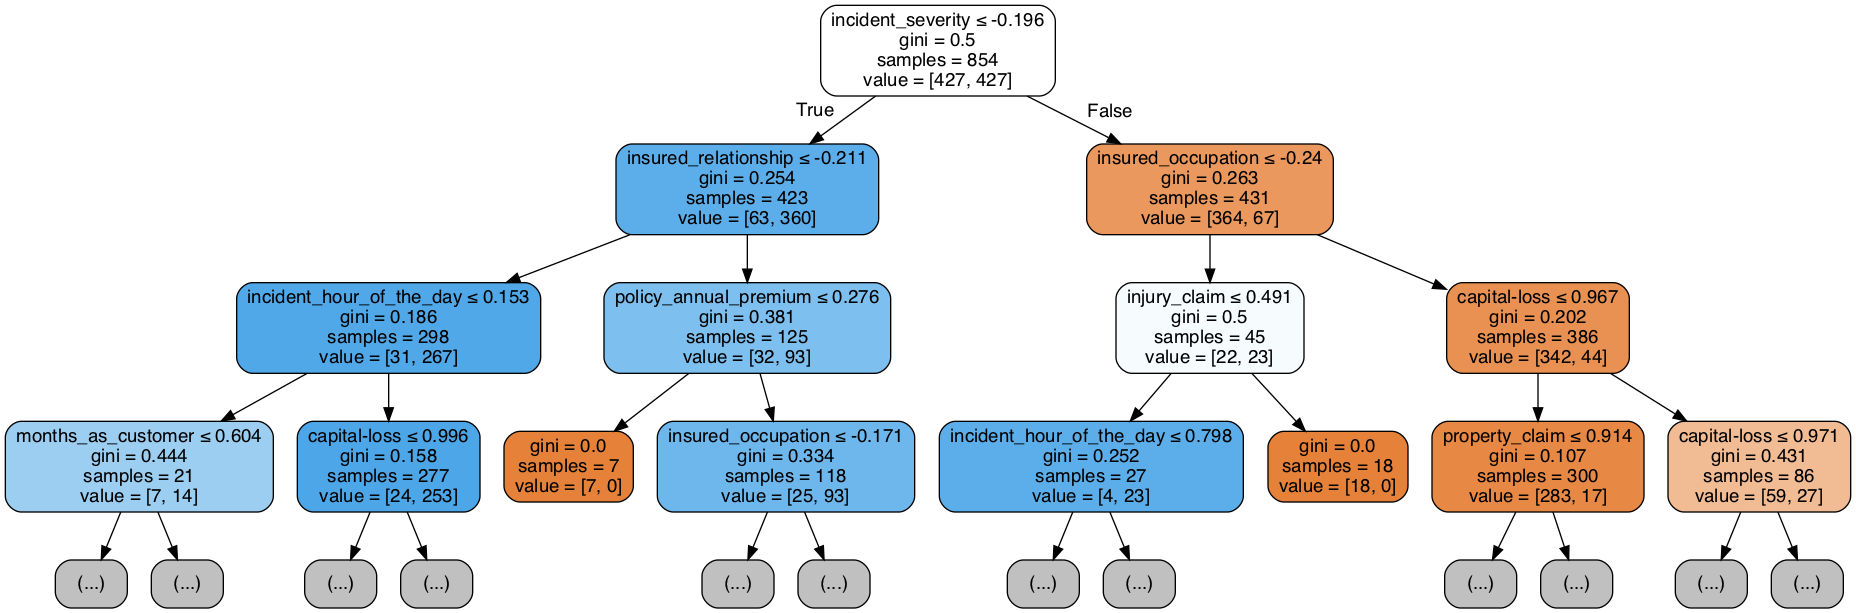

In [253]:
# this block of code creates a visual of a decision tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,max_depth=3,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Revisit validation on balanced test data

In [245]:
# combine data again to artificially balance data
test  = pd.concat([X_test, y_test], axis=1)

In [246]:
# look at current breakdown of target feature
round(test.fraud_reported.value_counts(),2)

0    179
1     48
Name: fraud_reported, dtype: int64

In [247]:
# split data into cases of fraud and non-fraud
true_2 = test[test.fraud_reported==0] 
fraud_2 = test[test.fraud_reported==1]

In [248]:
# upsample to fit the majority class
fraud_upsampled_2 = resample(fraud_2, replace=True, n_samples=len(true_2), random_state=seed)

In [249]:
# combine data
upsampled_2 = pd.concat([true_2, fraud_upsampled_2])

In [250]:
# split data again
y_test_2 = upsampled_2.fraud_reported
X_test_2 = upsampled_2.drop('fraud_reported', axis=1)

In [251]:
y_test_2.value_counts()

1    179
0    179
Name: fraud_reported, dtype: int64

In [252]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1600,min_samples_split=9,min_samples_leaf=2,max_features='sqrt',
                                       bootstrap=True,max_depth=70,random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test_2)
random_forest.score(X_test_2, y_test_2)
acc_random_forest = round(random_forest.score(X_test_2, y_test_2) * 100, 2)
p_score_rf = round(precision_score(y_test_2,Y_pred,average='binary')*100,2)
r_score_rf = round(recall_score(y_test_2,Y_pred,average='binary')*100,2)
f1_rf = round(f1_score(y_test_2,Y_pred,average='binary')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score_rf}, Recall: {r_score_rf} F1-Score {f1_rf}')
print(confusion_matrix(y_test_2, Y_pred))

Score: 71.79, Precision: 80.95, Recall: 56.98 F1-Score 66.89
[[155  24]
 [ 77 102]]
